In [1]:
import pandas as pd

df = pd.read_csv('postings.csv')
df.shape   
df.head()  
df.columns 


Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [3]:
df.info()               
df.isnull().sum()       
df.duplicated().sum()   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

0

In [7]:
def infer_industry(text):
    text = str(text).lower() 
    
    if any(keyword in text for keyword in ['developer', 'software', 'engineer', 'programmer', 'frontend', 'backend']):
        return 'Information Technology'
    elif any(keyword in text for keyword in ['nurse', 'hospital', 'medical', 'clinic', 'pharmaceutical']):
        return 'Healthcare'
    elif any(keyword in text for keyword in ['bank', 'finance', 'financial', 'accountant', 'investment']):
        return 'Finance'
    elif any(keyword in text for keyword in ['marketing', 'seo', 'branding', 'advertising', 'digital marketing']):
        return 'Marketing'
    elif any(keyword in text for keyword in ['teacher', 'education', 'university', 'school']):
        return 'Education'
    elif any(keyword in text for keyword in ['logistics', 'supply chain', 'warehouse', 'procurement']):
        return 'Logistics & Supply'
    elif any(keyword in text for keyword in ['construction', 'architect', 'civil', 'structural']):
        return 'Construction'
    else:
        return 'Other'



In [9]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [11]:
df['Industry'] = df['description'].apply(infer_industry)


In [13]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [15]:
df.head() 

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,Industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,Marketing
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,Healthcare
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,Other
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,Healthcare
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,Other


In [17]:
df['Industry'].value_counts()


Industry
Information Technology    42966
Healthcare                42690
Finance                   11097
Other                     10504
Education                 10176
Marketing                  3910
Construction               1330
Logistics & Supply         1176
Name: count, dtype: int64

In [19]:
df['Industry'] = df['Industry'].fillna('Other')  


In [21]:
df['Industry'].value_counts()

Industry
Information Technology    42966
Healthcare                42690
Finance                   11097
Other                     10504
Education                 10176
Marketing                  3910
Construction               1330
Logistics & Supply         1176
Name: count, dtype: int64

In [27]:
df = df.dropna(subset=['title', 'location'])  
df['Industry'] = df['Industry'].fillna('Unknown')


In [29]:
df = df.drop_duplicates()


In [31]:
# Total number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")


Total duplicate rows: 0


In [33]:

df['location'] = df['location'].str.lower().str.strip()
df['title'] = df['title'].str.lower().str.strip()


In [35]:
df['is_remote'] = df['description'].str.contains('remote', case=False, na=False)


In [37]:
df.head() 

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,Industry,is_remote
0,921716,Corcoran Sawyer Smith,marketing coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"princeton, nj",2774458.0,20.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,Marketing,False
1,1829192,NaN,mental health therapist/counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"fort collins, co",NaN,1.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,Healthcare,False
2,10998357,The National Exemplar,assitant restaurant manager,The National Exemplar is accepting application...,65000.0,YEARLY,"cincinnati, oh",64896719.0,8.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,Other,False
3,23221523,"Abrams Fensterman, LLP",senior elder law / trusts and estates associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"new hyde park, ny",766262.0,16.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,Healthcare,False
4,35982263,NaN,service technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"burlington, ia",NaN,3.0,NaN,...,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,Other,False


In [41]:
df['is_remote'].value_counts()

is_remote
False    106915
True      16934
Name: count, dtype: int64

In [43]:
df['location'].value_counts().head(10)


location
united states    8125
new york, ny     2756
chicago, il      1834
houston, tx      1762
dallas, tx       1383
atlanta, ga      1363
boston, ma       1176
austin, tx       1083
charlotte, nc    1075
phoenix, az      1059
Name: count, dtype: int64

is_remote
False    106915
True      16934
Name: count, dtype: int64


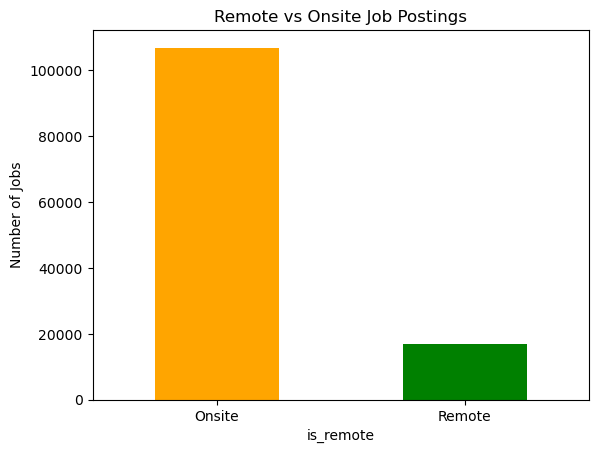

In [51]:




remote_counts = df['is_remote'].value_counts()

print(remote_counts)

import matplotlib.pyplot as plt

remote_counts.plot(kind='bar', color=['orange', 'green'])
plt.xticks(ticks=[0,1], labels=['Onsite', 'Remote'], rotation=0)
plt.title('Remote vs Onsite Job Postings')
plt.ylabel('Number of Jobs')
plt.show()




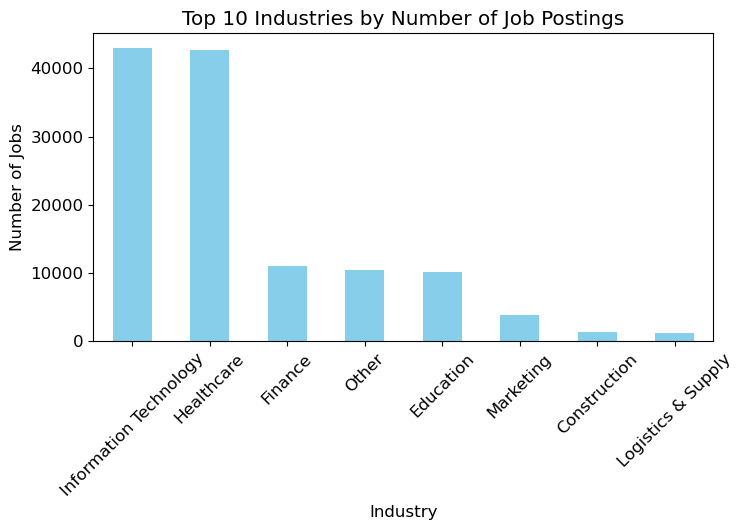

In [103]:
top_industries = df['Industry'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_industries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Industries by Number of Job Postings')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


In [61]:
def extract_function(title):
    title = title.lower()
    if 'engineer' in title or 'developer' in title:
        return 'Engineering'
    elif 'marketing' in title:
        return 'Marketing'
    elif 'analyst' in title or 'finance' in title:
        return 'Finance'
    elif 'hr' in title or 'human resources' in title:
        return 'HR'
    elif 'sales' in title:
        return 'Sales'
    elif 'designer' in title:
        return 'Design'
    elif 'product' in title:
        return 'Product Management'
    elif 'data' in title:
        return 'Data/Analytics'
    else:
        return 'Other'

df['Job Function'] = df['title'].apply(extract_function)



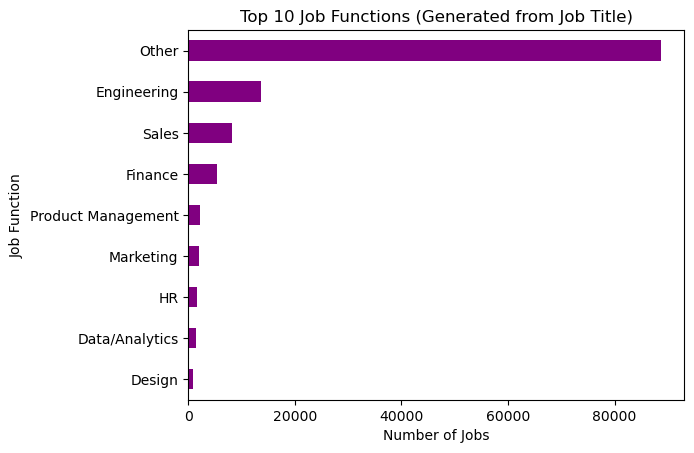

In [67]:
top_functions = df['Job Function'].value_counts().head(10)

top_functions.plot(kind='barh', color='purple')
plt.title('Top 10 Job Functions (Generated from Job Title)')
plt.xlabel('Number of Jobs')
plt.gca().invert_yaxis()
plt.show()


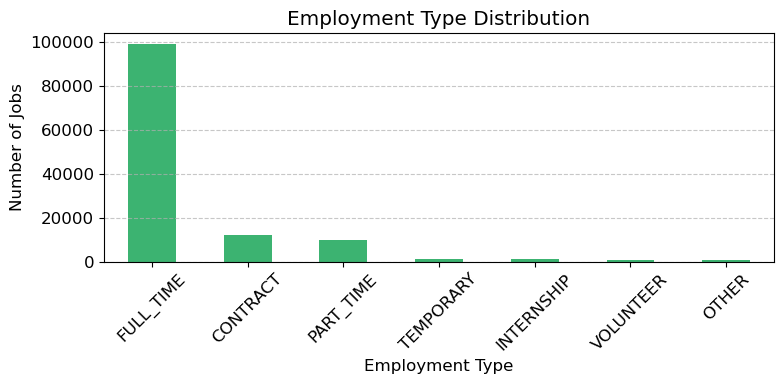

In [101]:
import matplotlib.pyplot as plt

# Step 1: Value Counts
employment_counts = df['work_type'].value_counts()

# Step 2: Bar Chart
plt.figure(figsize=(8,4))
employment_counts.plot(kind='bar', color='mediumseagreen')
plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





In [87]:
import numpy as np

df['log_salary'] = np.log1p(df['normalized_salary'])  # log1p avoids log(0)
Q1 = df['log_salary'].quantile(0.25)
Q3 = df['log_salary'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df_clean = df[(df['log_salary'] >= lower) & (df['log_salary'] <= upper)]




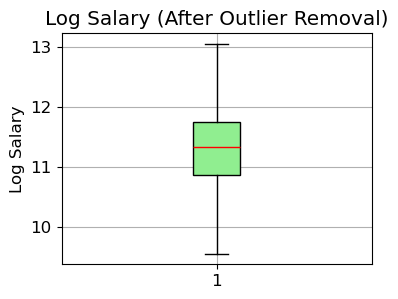

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
plt.boxplot(df_clean['log_salary'].dropna(),
            patch_artist=True,
            boxprops=dict(facecolor='lightgreen'),
            medianprops=dict(color='red'))
plt.title('Log Salary (After Outlier Removal)')
plt.ylabel('Log Salary')
plt.grid(True)
plt.show()


C:\Users\mahed\AppData\Local\Temp\ipykernel_14708\3985689329.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='work_type', y='log_salary', ci=None, palette='Set2')
C:\Users\mahed\AppData\Local\Temp\ipykernel_14708\3985689329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_clean, x='work_type', y='log_salary', ci=None, palette='Set2')


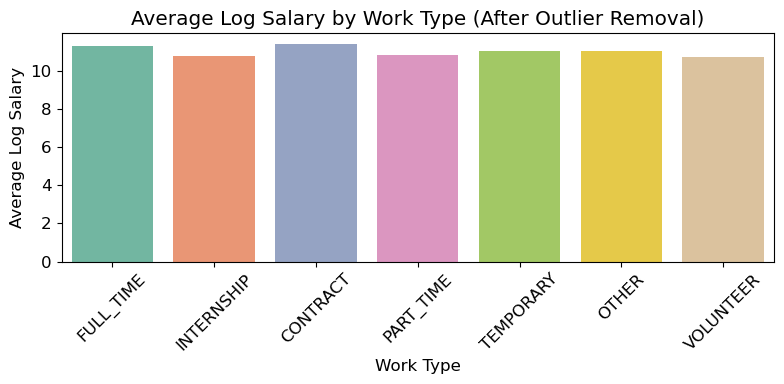

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.barplot(data=df_clean, x='work_type', y='log_salary', ci=None, palette='Set2')
plt.xticks(rotation=45)
plt.title('Average Log Salary by Work Type (After Outlier Removal)')
plt.xlabel('Work Type')
plt.ylabel('Average Log Salary')
plt.tight_layout()
plt.show()


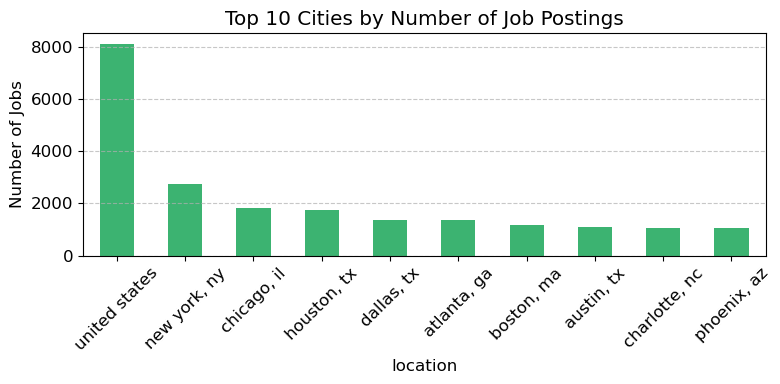

In [99]:
import matplotlib.pyplot as plt

top_cities = df['location'].value_counts().head(10)

plt.figure(figsize=(8,4))
top_cities.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Cities by Number of Job Postings')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [97]:
df.head() 

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,work_type,currency,compensation_type,normalized_salary,zip_code,fips,Industry,is_remote,Job Function,log_salary
0,921716,Corcoran Sawyer Smith,marketing coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"princeton, nj",2774458.0,20.0,NaN,...,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,Marketing,False,Marketing,10.557920
1,1829192,NaN,mental health therapist/counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"fort collins, co",NaN,1.0,NaN,...,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,Healthcare,False,Other,11.329015
2,10998357,The National Exemplar,assitant restaurant manager,The National Exemplar is accepting application...,65000.0,YEARLY,"cincinnati, oh",64896719.0,8.0,NaN,...,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,Other,False,Other,10.915107
3,23221523,"Abrams Fensterman, LLP",senior elder law / trusts and estates associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"new hyde park, ny",766262.0,16.0,NaN,...,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,Healthcare,False,Other,11.967187
4,35982263,NaN,service technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"burlington, ia",NaN,3.0,NaN,...,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,Other,False,Other,11.156265
